## Gestures Recognition with VGGNET - MPII/Coco Caffe Model ##

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [13]:
import sys
sys.path.append("C:/Users/Mafeus/Desktop/Git_Repos/OpenCV")
import OpCV_Utils

In [14]:
# MPII ref: http://human-pose.mpi-inf.mpg.de/
# Caffe Coco ref: http://cocodataset.org/#keypoints-2018

In [15]:
pose_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose'
images_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/imagens/imagens'
modules_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/modulos/modulos'
videos_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/Videos+prontos'

In [16]:
# In order to draw mpi body skeleton we need to define the body parts connections pair points:
mpi_number_of_points = 15
body_points_pairs = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], 
                     [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [17]:
point_color = (255, 128, 0)
line_color = (7, 62, 248)

(337, 600, 3)


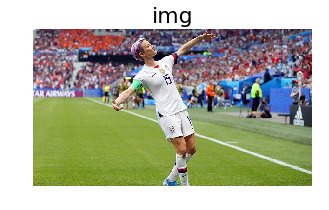

In [18]:
image_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/imagens/imagens/body/single/single_3.jpg'
image = cv2.imread(image_path)
print(image.shape)
OpCV_Utils.show_single_img_plt((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), 'img', (5,5))

In [19]:
image_copy = np.copy(image)
print(image_copy.shape[1], image_copy.shape[0])

600 337


In [20]:
# MPII config files:
proto_file_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
weights_file_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose/body/mpi/pose_iter_160000.caffemodel'

# Config Caffe Model:
model = cv2.dnn.readNetFromCaffe(proto_file_path, weights_file_path)

In [21]:
h_input = 368
w_input = int((h_input/image.shape[0])*image.shape[1])
w_input

655

In [22]:
# Transform img to compatible blob format:
blob_input = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0/255, size = (w_input, h_input), 
                                   mean = (0,0,0), swapRB = False, crop = False)

In [24]:
# Process image:
start = time.time()
model.setInput(blob_input)
output = model.forward()
end = time.time()
print('Time:', (end-start), 's')

Time: 5.126251459121704 s


In [23]:
output.shape

(1, 44, 46, 82)

In [24]:
height = output.shape[2]
width = output.shape[3]
print(height, width)

46 82


In [43]:
# Get Affinity:
point = 30

255.0
0.0


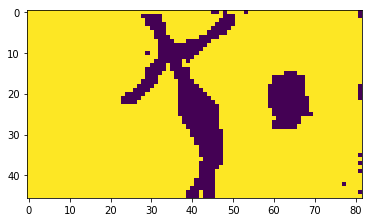

In [214]:
affinity_map_old = output[0, 16, :, :]

for point in range(16, 43):
    affinity_map = output[0, point, :, :]
    
    affinity_map = cv2.bitwise_or(affinity_map, affinity_map_old)
        
    affinity_map_old = affinity_map
    
    plt.imshow(affinity_map)
    
affinity_map = cv2.resize(affinity_map, (640, 640))
affinity_map = ((affinity_map + 2)*255)//255
affinity_map = affinity_map*255
print(np.max(affinity_map))
print(np.min(affinity_map))

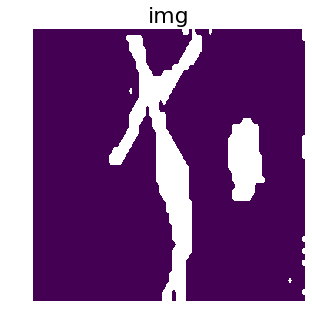

In [217]:
affinity_map = cv2.bitwise_not(affinity_map)
OpCV_Utils.show_single_img_plt(affinity_map, 'img', (5,5))

In [226]:
affinity_map = output[0, 1, :, :]
affinity_map

array([[0.00124126, 0.00142531, 0.00118992, ..., 0.00090048, 0.00094266,
        0.00103461],
       [0.00122375, 0.00152483, 0.00121263, ..., 0.0008532 , 0.0008852 ,
        0.00096205],
       [0.00128922, 0.00143915, 0.00115748, ..., 0.00085149, 0.00089408,
        0.00093365],
       ...,
       [0.00092368, 0.00089086, 0.00085101, ..., 0.00064081, 0.00078588,
        0.0009685 ],
       [0.0009664 , 0.00094024, 0.00090702, ..., 0.00071582, 0.00087439,
        0.00104126],
       [0.00101729, 0.00094904, 0.00096135, ..., 0.00074549, 0.00091744,
        0.00106196]], dtype=float32)

In [228]:
points = []
limit = 0.1

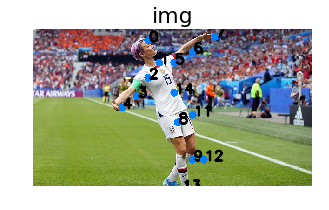

In [252]:
image_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/imagens/imagens/body/single/single_3.jpg'
image = cv2.imread(image_path)

for i in range(mpi_number_of_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _, p_coord = cv2.minMaxLoc(confidence_map)
    
    x = (w_input*p_coord[0])/width
    y = (h_input*p_coord[1])/height
    
    if (confidence > limit):
        cv2.circle(image, (int(x), int(y)), 8, point_color, thickness = -1, lineType = cv2.FILLED)
        cv2.putText(image, '{}'.format(i), (int(x)+2, int(y)+2), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                    (0, 0, 0), 3, lineType = cv2.LINE_AA)
        
        points.append((int(x), int(y)))

OpCV_Utils.show_single_img_plt(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'img', (5,5))

In [251]:
print(len(points))

15


In [261]:
size = cv2.resize(image, (w_input, h_input))
soft_map = cv2.GaussianBlur(size, (3,3), 0, 0)
mask_map = np.uint8(soft_map > limit)

In [262]:
body_points_pairs = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], 
                     [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [263]:
for pair in body_points_pairs:
    a = pair[0]
    b = pair[1]
    
    if (points[a] and points[b]):
        cv2.line(image, points[a], points[b], line_color, 3)
        cv2.circle(image, points[a], 8, point_color, thickness = -1, lineType = cv2.LINE_AA)
        
        cv2.line(mask_map , points[a], points[b], line_color, 3)
        cv2.circle(mask_map , points[a], 8, point_color, thickness = -1, lineType = cv2.LINE_AA)

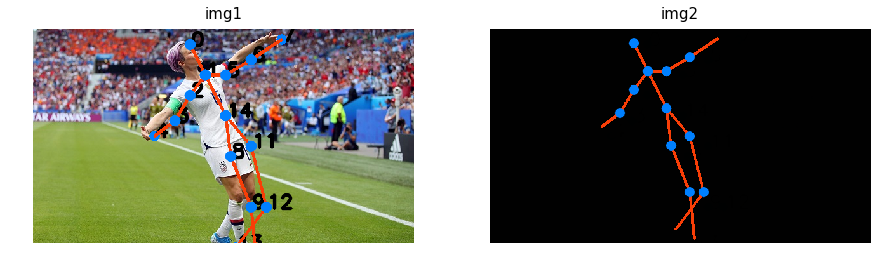

In [266]:
OpCV_Utils.show_multiple_imgs_plt([[cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.cvtColor(mask_map, cv2.COLOR_BGR2RGB)]],
                                    [['img1', 'img2']])